In [71]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange

from utils.statis import cal_SNR

In [72]:
# np.random.seed(1)

In [73]:
m = 1  # 假设生成 5 条不同的正弦信号
t = np.linspace(0, 10, 1000)  # 时间范围从 0 到 10，1000 个采样点
frequencies = np.linspace(1, 5, m)  # 生成从 1 到 5 的不同频率

signals = []
for f in frequencies:
    signal = np.sin(2 * np.pi * f * t)
    noise = np.random.normal(0, .1, len(t))  # 生成均值为 0，标准差为 0.5 的噪声
    noisy_signal = signal + noise
    signals.append(noisy_signal)

signals = np.array(signals)

In [74]:
# plt.plot(t, signals.T)
# plt.show()

In [75]:
snrs = cal_SNR(signals)
snrs

array([5.47466914])

## 在mFHN中测试

In [76]:
from nodes.FHN import mFHN

In [77]:
dt = 0.01

In [78]:
node = mFHN()
node.omega = 0.005

In [79]:
for i in range(10000):
    node()

mem = []
for i in range(200000):
    node()
    mem.append(node.mem.copy())


In [ ]:
plt.plot(mem)
plt.show()

In [82]:
D = 0.007
mem = []
for i in range(500000):
    node()
    noise = np.random.normal(loc=0., scale=np.sqrt(2*D*dt), size=1)  
    node.mem += noise
    mem.append(node.mem.copy())

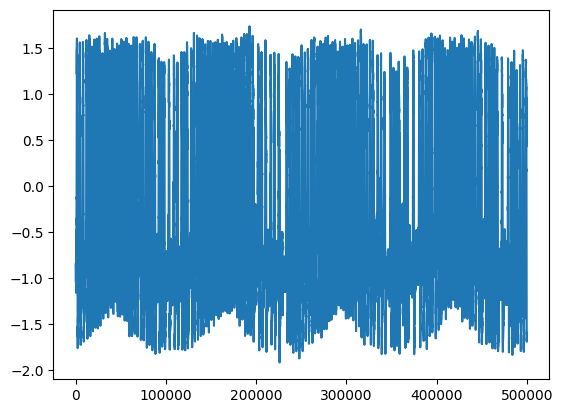

In [83]:
plt.plot(mem)
plt.show()

In [84]:
mem = np.array(mem).T
snrs = cal_SNR(mem)
snrs

array([0.47561459])